## Loading necessary libraries

In [85]:
# Start with loading all necessary libraries
import numpy as np
import pandas as pd
import requests
import plotly
import plotly.express as px
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline

## BC Division Legislation

In [143]:
url = "https://goverlytics.p.rapidapi.com/division-legislation/ca/bc?limit=1000"

querystring = {"include_summary":"true","include_votes":"true","include_actions":"true","include_text":"true"}

headers = {
    'x-rapidapi-host': "goverlytics.p.rapidapi.com",
    'x-rapidapi-key': "9683493469msh237d2eccd560f26p17fef0jsn788326025e1f"
    }

response = requests.request("GET", url, headers=headers, params=querystring)
div_legislation = response.json()
div_legislation = pd.json_normalize(div_legislation['data'])
div_legislation.to_excel('bc_legislation.xlsx')

## AB Division Legislation

In [148]:
url = "https://goverlytics.p.rapidapi.com/division-legislation/ca/ab?limit=1000"

querystring = {"include_summary":"true","include_votes":"true","include_actions":"true","include_text":"true"}

headers = {
    'x-rapidapi-host': "goverlytics.p.rapidapi.com",
    'x-rapidapi-key': "9683493469msh237d2eccd560f26p17fef0jsn788326025e1f"
    }

response = requests.request("GET", url, headers=headers, params=querystring)
ab_Legislation = response.json()
ab_Legislation = pd.json_normalize(ab_Legislation['data'])
ab_Legislation.to_excel('ab_Legislation.xlsx')

## ON Division Legislation

In [151]:
url = "https://goverlytics.p.rapidapi.com/division-legislation/ca/on?page=1"
querystring = {"include_summary":"true","include_text":"true","include_actions":"true","include_votes":"true"}
headers = {
    'x-rapidapi-host': "goverlytics.p.rapidapi.com",
    'x-rapidapi-key': "9683493469msh237d2eccd560f26p17fef0jsn788326025e1f"
    }
response = requests.request("GET", url, headers=headers, params=querystring)
on_Legislation_json = response.json()
on_Legislation_dic = dict(on_Legislation_json)
on_Legislation_df = pd.json_normalize(on_Legislation_json['data'])
on_Legislation_table = on_Legislation_df
on_Legislation_dic['pagination']['next_url']
url_0 = "https://goverlytics.p.rapidapi.com/division-legislation/ca/on?page="
page_num = 2
while on_Legislation_dic['pagination']['next_url']:
    new_url = url_0 + str(page_num)
    page_num += 1
    response = requests.request("GET", new_url, headers=headers, params=querystring)
    on_Legislation_json = response.json()
    on_Legislation_dic = dict(on_Legislation_json)
    on_Legislation_df = pd.json_normalize(on_Legislation_json['data'])
    on_Legislation_table = on_Legislation_table.append(on_Legislation_df, ignore_index=True)

on_Legislation_table.to_excel('on_Legislation.xlsx')

## BC Division Legislators

In [103]:
url = "https://goverlytics.p.rapidapi.com/division-legislators/ca/bc?limit=1000"

querystring = {"is_active":"true"}

headers = {
    'x-rapidapi-host': "goverlytics.p.rapidapi.com",
    'x-rapidapi-key': "9683493469msh237d2eccd560f26p17fef0jsn788326025e1f"
    }

response = requests.request("GET", url, headers=headers, params=querystring)
div_Legislators = response.json()
div_Legislators = pd.json_normalize(div_Legislators['data'])
div_Legislators.to_excel('div_Legislators.xlsx')

## Federal Legislation

In [140]:
url = "https://goverlytics.p.rapidapi.com/federal-legislation/ca?page=1"

querystring = {"include_summary":"true","include_text":"true","include_actions":"true","include_votes":"true"}

headers = {
    'x-rapidapi-host': "goverlytics.p.rapidapi.com",
    'x-rapidapi-key': "9683493469msh237d2eccd560f26p17fef0jsn788326025e1f"
    }

response = requests.request("GET", url, headers=headers, params=querystring)
fed_Legislation_json = response.json()
fed_Legislation_dic = dict(fed_Legislation_json)
fed_Legislation_df = pd.json_normalize(fed_Legislation_json['data'])
fed_Legislation_table = fed_Legislation_df
fed_Legislation_df.to_excel('fed_Legislation.xlsx')
fed_Legislation_dic['pagination']['next_url']

url_0 = "https://goverlytics.p.rapidapi.com/federal-legislation/ca?page="
page_num = 2
while fed_Legislation_dic['pagination']['next_url']:
    new_url = url_0 + str(page_num)
    page_num += 1
    response = requests.request("GET", new_url, headers=headers, params=querystring)
    fed_Legislation_json = response.json()
    fed_Legislation_dic = dict(fed_Legislation_json)
    fed_Legislation_df = pd.json_normalize(fed_Legislation_json['data'])
    fed_Legislation_table = fed_Legislation_table.append(fed_Legislation_df, ignore_index=True)

## Federal Legislators

In [153]:
url = "https://goverlytics.p.rapidapi.com/federal-legislators/ca?page=1"
querystring = {"include_summary":"true","include_text":"true","include_actions":"true","include_votes":"true"}
headers = {
    'x-rapidapi-host': "goverlytics.p.rapidapi.com",
    'x-rapidapi-key': "9683493469msh237d2eccd560f26p17fef0jsn788326025e1f"
    }
response = requests.request("GET", url, headers=headers, params=querystring)
fed_Legislators_json = response.json()
fed_Legislators_dic = dict(fed_Legislators_json)
fed_Legislators_df = pd.json_normalize(fed_Legislators_json['data'])
fed_Legislators_table = fed_Legislators_df
fed_Legislators_dic['pagination']['next_url']
url_0 = "https://goverlytics.p.rapidapi.com/federal-legislators/ca?page="
page_num = 2
while fed_Legislators_dic['pagination']['next_url']:
    new_url = url_0 + str(page_num)
    page_num += 1
    response = requests.request("GET", new_url, headers=headers, params=querystring)
    fed_Legislators_json = response.json()
    fed_Legislators_dic = dict(fed_Legislators_json)
    fed_Legislators_df = pd.json_normalize(fed_Legislators_json['data'])
    fed_Legislators_table = fed_Legislators_table.append(fed_Legislators_df, ignore_index=True)
    
fed_Legislators_table.to_excel('fed_Legislators.xlsx')

## Treemap for BC's Legislation Topic

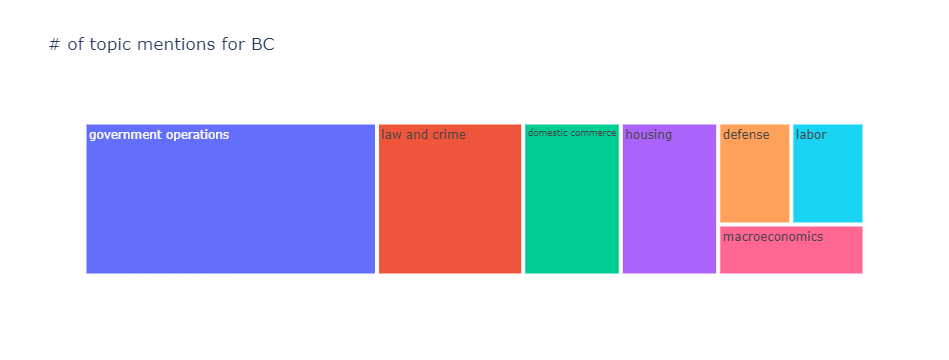

In [145]:
BC_topic = div_legislation['topic']
topic_dic = dict()
for topic in BC_topic:
    if topic in topic_dic:
        topic_dic[topic] += 1
    else:
        topic_dic[topic] = 1
BC_df = pd.DataFrame(list(topic_dic.items()),columns = ['topic','count'])
fig = px.treemap(BC_df, path=["topic"], values="count", title = "# of topic mentions for BC")
fig.data[0].hovertemplate = '%{label}<br>%{value}'
fig.write_html("BC_topic.html")
fig.show()

## Dominant Political Party for each Province

In [181]:
fed_party = list(fed_Legislators_table["party"])

fed_party_dic = dict()
for party in fed_party:
    if party in fed_party_dic:
        fed_party_dic[party] += 1
    else:
        fed_party_dic[party] = 1
party_df = pd.DataFrame(list(fed_party_dic.items()),columns = ['party','count'])

In [182]:
party_df

,party,count
0,New Democratic,28
1,Independent Senators Group,45
2,Progressive Senate Group,15
3,Liberal,180
4,Conservative,156
5,Independent,6
6,Bloc Québécois,35
7,Canadian Senators Group,13
8,Green,3
9,Non-affiliated,6
